In [1]:
import pandas as pd
import re
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
#read data
amazon = pd.read_csv('amazon_prime_titles.csv')
amazon

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [4]:
amazon.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [5]:
amazon.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
amazon.shape

(9668, 12)

In [7]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [10]:
amazon.nunique()

show_id         9668
type               2
title           9668
director        5774
cast            7927
country           86
date_added        84
release_year     100
rating            24
duration         219
listed_in        518
description     9414
dtype: int64

In [11]:
amazon.isnull().values.any()

True

In [12]:
amazon.isnull().sum().sum()

22161

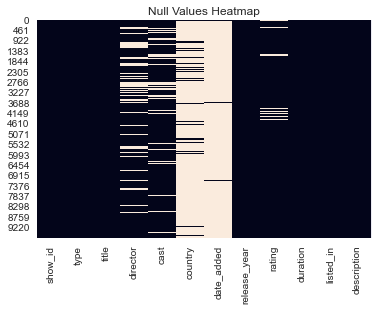

In [13]:
sns.heatmap(amazon.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [14]:
amazon.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [15]:
amazon['director'].fillna('No Director', inplace=True)
amazon['cast'].fillna('No Cast', inplace=True)
amazon['country'].fillna('Country Unavailable', inplace=True)
amazon.dropna(subset=['date_added','rating'],inplace=True)

In [16]:
amazon.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [17]:
amazon_shows = amazon[amazon['type']=='TV Show'].copy()
amazon_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
553,s554,TV Show,The Lucy Show,No Director,"Lucille Ball, Vivian Vance, Gale Gordon, Jimmy...",Country Unavailable,"March 30, 2021",1967,13+,3 Seasons,Comedy,"After her husband's death, Lucy Carmichael, an..."
1089,s1090,TV Show,Scaredy Squirrel,No Director,"Terry McGurrin, Jonathan Gould, Pat McKenna, L...",Country Unavailable,"March 30, 2021",2012,TV-G,4 Seasons,"Animation, Kids",Based on a series of children's books written ...
1442,s1443,TV Show,Oddbods,No Director,No Cast,Country Unavailable,"March 30, 2021",2020,ALL,2 Seasons,"Animation, Comedy, Kids",Oddbods is an award winning animated series th...
2096,s2097,TV Show,Inspector Manara (English Subtitled),No Director,"Guido Caprino, Roberta Giarrusso, Anna Safronc...",Country Unavailable,"March 30, 2021",2011,TV-NR,2 Seasons,"International, Suspense",In Italian with English subtitles. In season 2...
2888,s2889,TV Show,Chacha Vidhayak Hain Humare,No Director,"Zakir Khan, Vyom Sharma, Kumar Varun, Zakir Hu...",Country Unavailable,"March 30, 2021",2021,13+,2 Seasons,"Comedy, Drama","Ronny's lie of working for his 'Chacha', the M..."


In [20]:
amazon_movies = amazon[amazon['type']=='Movie'].copy()
amazon_movies.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
